## Observations and Insights 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [ ]:
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
merge_df

In [ ]:
# Checking the number of mice.
len(set(merge_df['Mouse ID']))

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
removedupes = merge_df.groupby(['Mouse ID', 'Timepoint']).size().reset_index()
removedupes[removedupes[0] > 1]

,Mouse ID,Timepoint,0
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [5]:
cleanmerge = merge_df.drop(merge_df.index[merge_df['Mouse ID'] == 'g989'])
cleanmerge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
cleanmerge['Mouse ID'].value_counts()

o331    10
i334    10
s185    10
c139    10
k403    10
        ..
v199     1
b447     1
u153     1
x336     1
l872     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
groupbydrug = cleanmerge.groupby('Drug Regimen')
groupbydrug.max()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,y793,45,48.158209,3,Male,24,25
Ceftamin,y865,45,68.923185,4,Male,24,30
Infubinol,z581,45,72.226731,4,Male,24,30
Ketapril,y260,45,78.567014,4,Male,24,30
Naftisol,z969,45,76.668817,4,Male,23,30
Placebo,y478,45,73.212939,4,Male,21,30
Propriva,z435,45,72.455421,4,Male,24,30
Ramicane,z578,45,47.622816,3,Male,23,25
Stelasyn,z314,45,75.123690,4,Male,23,30


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
meantumorvol = groupbydrug['Tumor Volume (mm3)'].mean()
medtumorvol = groupbydrug['Tumor Volume (mm3)'].median()
tumorvolvar = groupbydrug['Tumor Volume (mm3)'].var(ddof=1)
tumorvolstd = groupbydrug['Tumor Volume (mm3)'].std(ddof=1)
tumorvolsem = groupbydrug['Tumor Volume (mm3)'].sem(ddof=1)
sumstattumor = pd.DataFrame({
    "Mean Tumor Volume": meantumorvol,
    "Median Tumor Volume": medtumorvol,
    "Tumor Volume Variance": tumorvolvar,
    "Tumor Voluem Std. Dev.": tumorvolstd,
    "Tumor Volume Std. Err.": tumorvolsem,
})
sumstattumor

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Voluem Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
groupbytumor = cleanmerge.groupby('Drug Regimen', as_index=True).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
groupbytumor

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

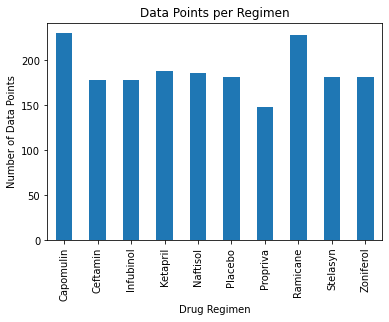

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
panchart = pd.DataFrame({
    'Drug Regimen':groupbydrug['Drug Regimen'].unique()
})
panchart["Mouse Count"] = groupbydrug["Mouse ID"].count()
pybar = panchart.plot(y="Mouse Count", rot=90, kind='bar', legend=False)
pybar.set_title('Data Points per Regimen')
pybar.set_xlabel('Drug Regimen')
pybar.set_ylabel('Number of Data Points')

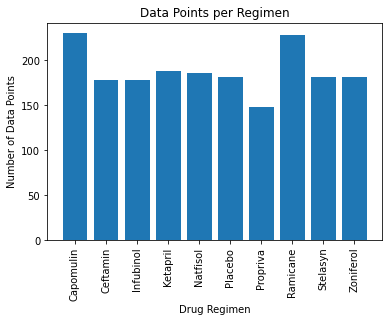

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y_axis = panchart["Mouse Count"]
x_axis = np.arange(len(panchart['Mouse Count']))
plt.bar(x_axis, y_axis, align='center')
plt.title('Data Points per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
tick_locations = [value for value in x_axis]
barlabel = ['Capomulin','Ceftamin','Infubinol','Ketapril','Natfisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
plt.xticks(tick_locations, barlabel, rotation='vertical')
plt.show()

Text(0, 0.5, 'Sex')

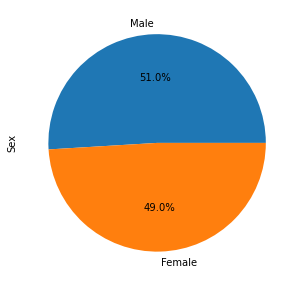

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
panpiechart = pd.DataFrame({
    'Sex': ['Male','Female'],
    'Mouse Count': cleanmerge['Sex'].value_counts()
})
panpie = panpiechart.plot.pie(y='Mouse Count', figsize = (5, 5), autopct="%1.1f%%", legend=False)
plt.ylabel('Sex')

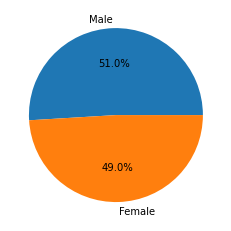

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pypie = plt.pie(panpiechart['Mouse Count'], labels=panpiechart['Sex'], autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
simpledata = cleanmerge[["Drug Regimen","Mouse ID","Timepoint", "Tumor Volume (mm3)"]]
simplerdata = simpledata[(simpledata["Drug Regimen"] == "Capomulin") | (simpledata["Drug Regimen"] == "Ramicane") |
                            (simpledata["Drug Regimen"] == "Infubinol") | (simpledata["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
maxtime = simplerdata.sort_values('Timepoint', ascending=False).drop_duplicates(['Mouse ID'])
maxtime
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#newmerge = pd.merge(simplerdata, maxtime, on=["Mouse ID", "Drug Regimen"])
#newmerge = newmerge.rename(columns={"Timepoint_x":"Timepoint", 
#                                    "Tumor Volume (mm3)_x":"Tumor Volume (mm3)", 
#                                    "Timepoint_y":"Max Timepoint",
#                                    "Tumor Volume (mm3)_y": "Max Tumor Volume"})
#newmerge

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1892,Capomulin,m601,45,28.430964
1700,Capomulin,s185,45,23.343598
1364,Ceftamin,y865,45,64.729837
1497,Ceftamin,x581,45,64.634949
1844,Capomulin,l897,45,38.846876
...,...,...,...,...
1427,Infubinol,m756,5,47.010364
1467,Ceftamin,b447,0,45.000000
1649,Ceftamin,t573,0,45.000000
1401,Ceftamin,u153,0,45.000000


In [42]:
#INSTRUCTOR PROVIDED SECTION. THIS WILL LOOK LIKE A LOT OF MY PEER'S CODES. THIS FOLLOWING CELL WAS PROVIDED BY OUR INSTRUCTOR.

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = maxtime.loc[maxtime["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

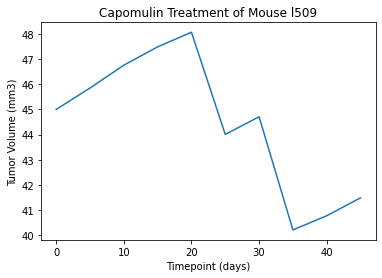

In [46]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
selectmouse = cleanmerge[(cleanmerge["Mouse ID"] == "l509")]
capoplot = plt.plot(selectmouse['Timepoint'], selectmouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()


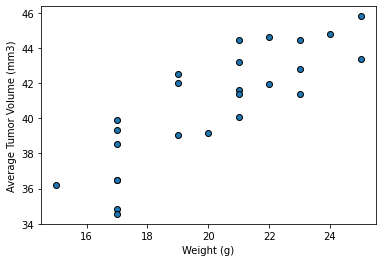

In [72]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
selectdrug = cleanmerge[(cleanmerge["Drug Regimen"] == "Capomulin")]
avgtumorvol = selectdrug.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouseweight = selectdrug.groupby('Mouse ID')['Weight (g)'].max()
scatweight = plt.scatter(mouseweight, avgtumorvol, marker='o', edgecolors='black')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

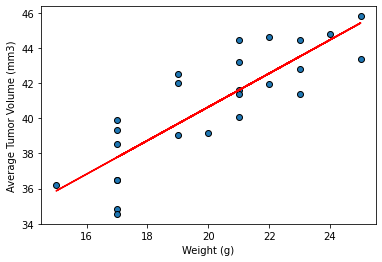

In [80]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
selectdrug = cleanmerge[(cleanmerge["Drug Regimen"] == "Capomulin")]
avgtumorvol = selectdrug.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouseweight = selectdrug.groupby('Mouse ID')['Weight (g)'].max()
scatweight = plt.scatter(mouseweight, avgtumorvol, marker='o', edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouseweight, avgtumorvol)
regress_values = mouseweight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(mouseweight,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()